# Data Analysis Project: Bike Sharing Dataset

- Name: Anisa Nurwidiastuti
- Email: anisanurwidia236@gmail.com
- Id Dicoding: 2700803

## 1. Project Introduction
### 1.1 Background

### 1.2 Dataset

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

### 1.3 Dataset Characteristic

## 2. Defining Business Questions

1. How many accumulated bikes rides per month?
2. How compared member and non-member customers total?
3. How's total rides based on weather of bike sharing?
4. Whar count of bikes rented in 2011 and 2012 per hour?

## 3. Import the Libraries

Import the required library for data manipulation, data analysis and data visualization

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Data Wrangling

### 4.1 Gathering Data

### Load day.csv

In [6]:
day_df = pd.read_csv("https://raw.githubusercontent.com/anisanwidiaa/Bike-share-dataset/main/Data/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


### Load hour.csv

In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/anisanwidiaa/Bike-share-dataset/main/Data/hour.csv")
hour_df.head(10)

### 4.2 Assessing Data

### Check for Missing Values

In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Check Data Information

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Check for Duplicated Data

In [10]:
print("Duplication data: ", day_df.duplicated().sum())

Duplication data:  0


### Check Statistics Summary

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
#Check total of missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
#Check data information
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
print("Duplication data: ", hour_df.duplicated().sum())

Duplication data:  0


In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### 4.3 Cleaning Data

### Change the data type

In [16]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

### Convert Values

In [18]:
# Convert the values for the 'season' column 1,2,3,4 to Winter,Spring,Summer,Fall
day_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Convert value for column 'yr' 0.1 to 2011,2012
day_df.yr.replace((0,1), (2011,2012), inplace=True)

# Convert values for column 'mnth' 1,2,3,4-12 to Jan,Feb,Mar,Apr-Dec
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Convert the value for the 'holiday' column 0.1 to No,Yes
day_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)

# Convert values for column 'weekday' 0,1,2,3,4,5,6 to Sun,Mon,Tue,Wed,Thu,Fri,Sat
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)

# Convert the value for the 'workingday' column 0.1 to No,Yes
day_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

# Convert the values for the 'weathersit' column 1,2,3,4 to Clear,Misty,Light_RainSnow,Heavy_RainSnow
day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

### Replace column headers

In [19]:
day_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "casual": "nonmember",
    "registered": "member",
    "cnt": "total_count"
}, inplace=True)

In [20]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,1,2011-01-01,Winter,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,Jan,No,Sun,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,Jan,No,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Delete unnecessary columns (instant)

In [21]:
day_df = day_df.drop("instant", axis =1)
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,2011-01-01,Winter,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,Jan,No,Sun,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,Jan,No,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = hour_df.season.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [24]:
# Convert the values for the 'season' column 1,2,3,4 to Winter,Spring,Summer,Fall
hour_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Convert value for column 'yr' 0.1 to 2011,2012
hour_df.yr.replace((0,1), (2011,2012), inplace=True)

# Convert values for column 'mnth' 1,2,3,4-12 to Jan,Feb,Mar,Apr-Dec
hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Convert the value for the 'holiday' column 0.1 to No,Yes
hour_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)

# Convert values for column 'weekday' 0,1,2,3,4,5,6 to Sun,Mon,Tue,Wed,Thu,Fri,Sat
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)

# Convert the value for the 'workingday' column 0.1 to No,Yes
hour_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

# Convert the values for the 'weathersit' column 1,2,3,4 to Clear,Misty,Light_RainSnow,Heavy_RainSnow
hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

In [25]:
# Replace column headers
hour_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "weathersit" : "weather",
    "hum" : "humidity",
    "casual": "nonmember",
    "registered": "member",
    "cnt": "total_count"
}, inplace=True)

In [26]:
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,1,2011-01-01,Winter,2011,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
hour_df = hour_df.drop("instant", axis =1)
hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,2011-01-01,Winter,2011,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [28]:
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,2011-01-01,Winter,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,Jan,No,Sun,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,Jan,No,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [29]:
hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,2011-01-01,Winter,2011,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


### Merge Data (Day & Hour csv)

In [30]:
bike_sharing = day_df.merge(hour_df, on='dateday', how='inner', suffixes=('_daily', '_hourly'))
bike_sharing.head()

,dateday,season_daily,year_daily,month_daily,holiday_daily,weekday_daily,workingday_daily,weather_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weather_hourly,temp_hourly,atemp_hourly,humidity_hourly,windspeed_hourly,nonmember_hourly,member_hourly,total_count_hourly
0,2011-01-01,Winter,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,...,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,...,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,...,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,...,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,...,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


### Save the cleaned dataset

In [31]:
bike_sharing.to_csv("bike_sharing.csv", index=False)

## 5. Exploratory Data Analysis (EDA)

In [32]:
bike_sharing.dtypes

dateday               datetime64[ns]
season_daily                category
year_daily                     int64
month_daily                 category
holiday_daily               category
weekday_daily               category
workingday_daily            category
weather_daily               category
temp_daily                   float64
atemp_daily                  float64
humidity_daily               float64
windspeed_daily              float64
nonmember_daily                int64
member_daily                   int64
total_count_daily              int64
season_hourly               category
year_hourly                    int64
month_hourly                category
hour                           int64
holiday_hourly              category
weekday_hourly              category
workingday_hourly           category
weather_hourly              category
temp_hourly                  float64
atemp_hourly                 float64
humidity_hourly              float64
windspeed_hourly             float64
n

### 5.1 Bikeshare users by year

In [33]:
bike_sharing.groupby(by="year_daily", observed=False).agg({
        "total_count_hourly": ["sum","mean"]
})

total_count_hourly            
                          sum        mean
year_daily                               
2011                  1243103  143.794448
2012                  2049576  234.666361

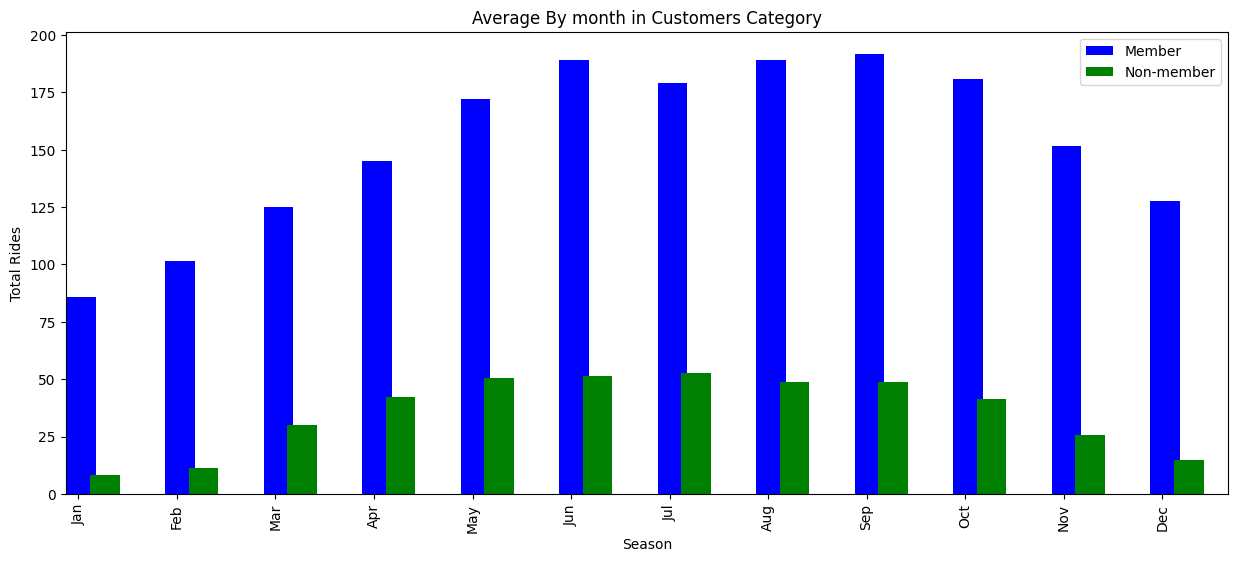

In [34]:
monthly_data = bike_sharing.groupby(by="month_daily", observed=False).agg({
    "member_hourly": "mean",
    "nonmember_hourly": ["mean"] 
})

fig, ax = plt.subplots(figsize=(15, 6))

monthly_data["member_hourly"]["mean"].plot(kind='bar', color='blue', position=0.4, width=0.3, label='Member', ax=ax)

monthly_data["nonmember_hourly"]["mean"].plot(kind='bar', color='green', position=-0.4, width=0.3, label='Non-member', ax=ax)

ax.set_title('Average By month in Customers Category')
ax.set_xlabel('Season')
ax.set_ylabel('Total Rides')
ax.legend()
plt.show()

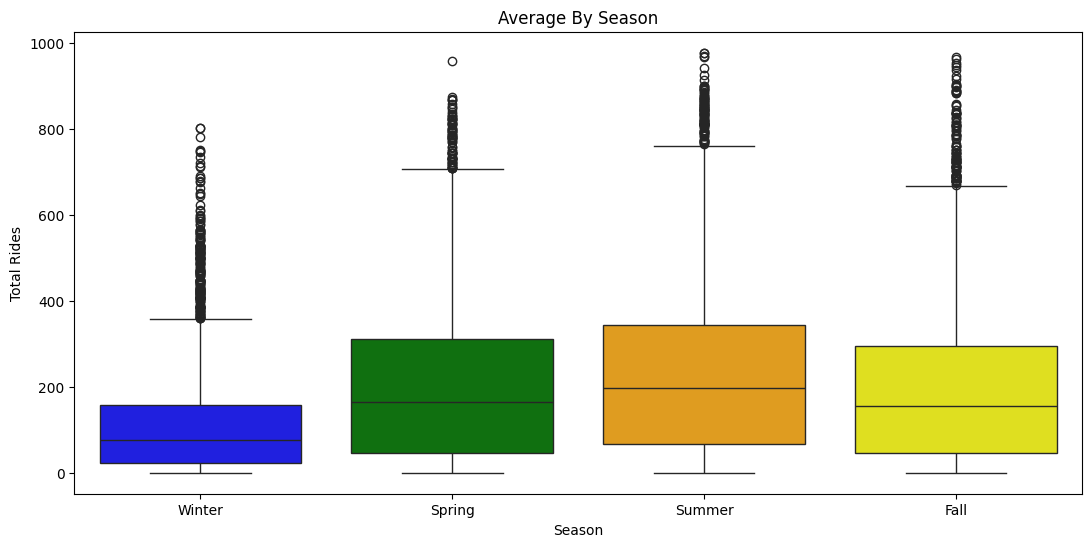

In [35]:
plt.figure(figsize=(13,6))

sns.boxplot(
    x="season_daily",
    y="total_count_hourly",
    hue="season_daily",
    data=bike_sharing,
    palette=["blue", "green", "orange", "yellow"],
    legend=False
)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Average By Season")

plt.show()

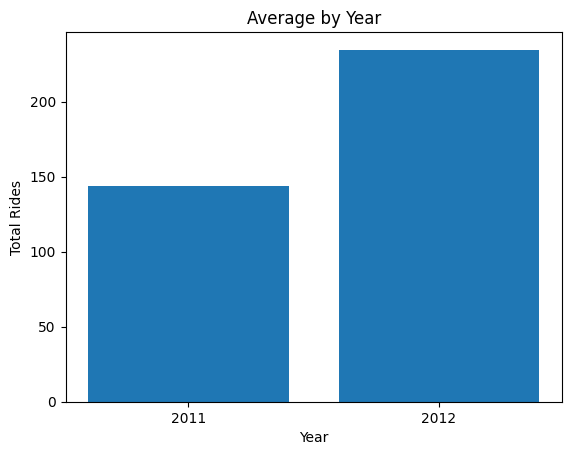

In [36]:
year_data = bike_sharing.groupby('year_daily', observed=False)['total_count_hourly'].mean()
year_names = ['2011', '2012']

plt.bar(year_names, year_data)
plt.xlabel('Year')
plt.ylabel('Total Rides')
plt.title('Average by Year')
plt.show()

### 5.2 Bikeshare users by season

In [37]:
bike_sharing.groupby(by="season_daily", observed=False).agg({
        "total_count_hourly": ["sum","mean", "max", "min"]
})

total_count_hourly                     
                            sum        mean  max min
season_daily                                        
Winter                   471348  111.114569  801   1
Spring                   918589  208.344069  957   1
Summer                  1061129  236.016237  977   1
Fall                     841613  198.868856  967   1

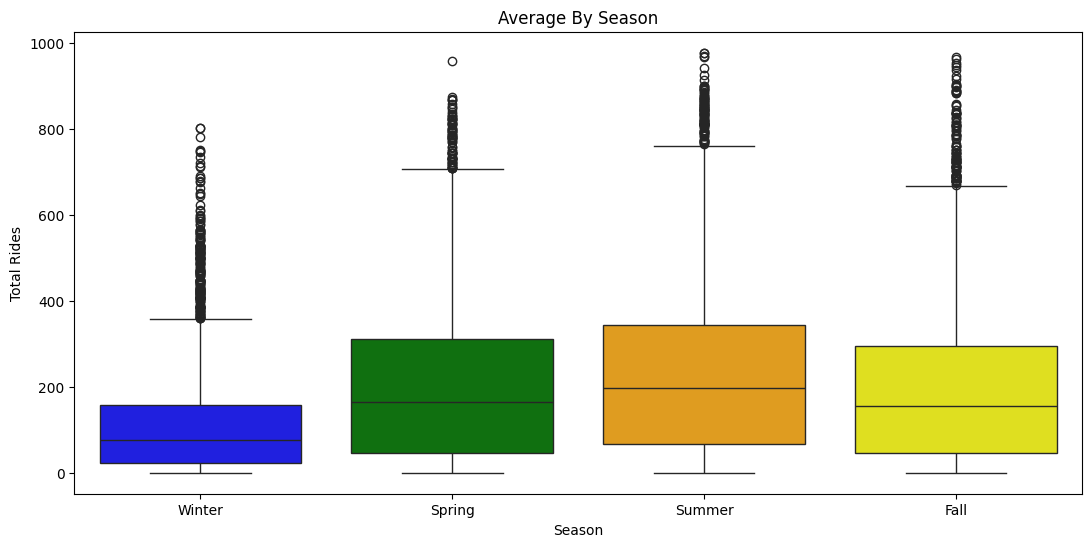

In [38]:
plt.figure(figsize=(13,6))

sns.boxplot(
    x="season_daily",
    y="total_count_hourly",
    hue="season_daily",
    data=bike_sharing,
    palette=["blue", "green", "orange", "yellow"],
    legend=False
)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Average By Season")

plt.show()

### 5.3 Bikeshare users by month

In [39]:
bike_sharing.groupby(by="month_daily", observed=False).agg({
        "total_count_hourly": ["sum","mean", "max", "min", "std"]
})

total_count_hourly                                 
                           sum        mean  max min         std
month_daily                                                    
Jan                     134933   94.424773  559   1   99.907146
Feb                     151352  112.865026  610   1  112.486565
Mar                     228920  155.410726  957   1  163.543050
Apr                     269094  187.260960  822   1  181.137902
May                     331686  222.907258  873   1  187.721497
Jun                     346342  240.515278  900   1  196.038950
Jul                     344948  231.819892  913   1  187.483806
Aug                     351194  238.097627  941   1  200.444648
Sep                     345991  240.773138  977   1  214.609531
Oct                     322352  222.158511  963   1  203.477057
Nov                     254831  177.335421  729   1  158.973887
Dec                     211036  142.303439  759   1  141.080674

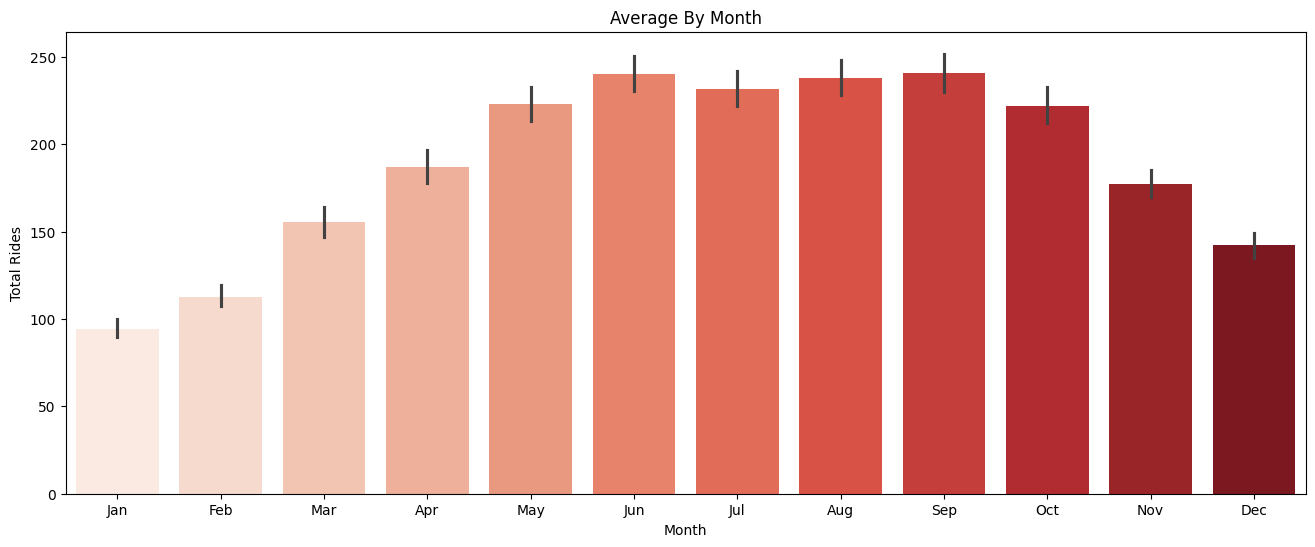

In [40]:
plt.figure(figsize=(16, 6))

sns.barplot(
    x="month_daily",
    y="total_count_hourly",
    hue="month_daily",
    data=bike_sharing,
    palette="Reds",
    legend=False
)

plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Average By Month")

plt.show()

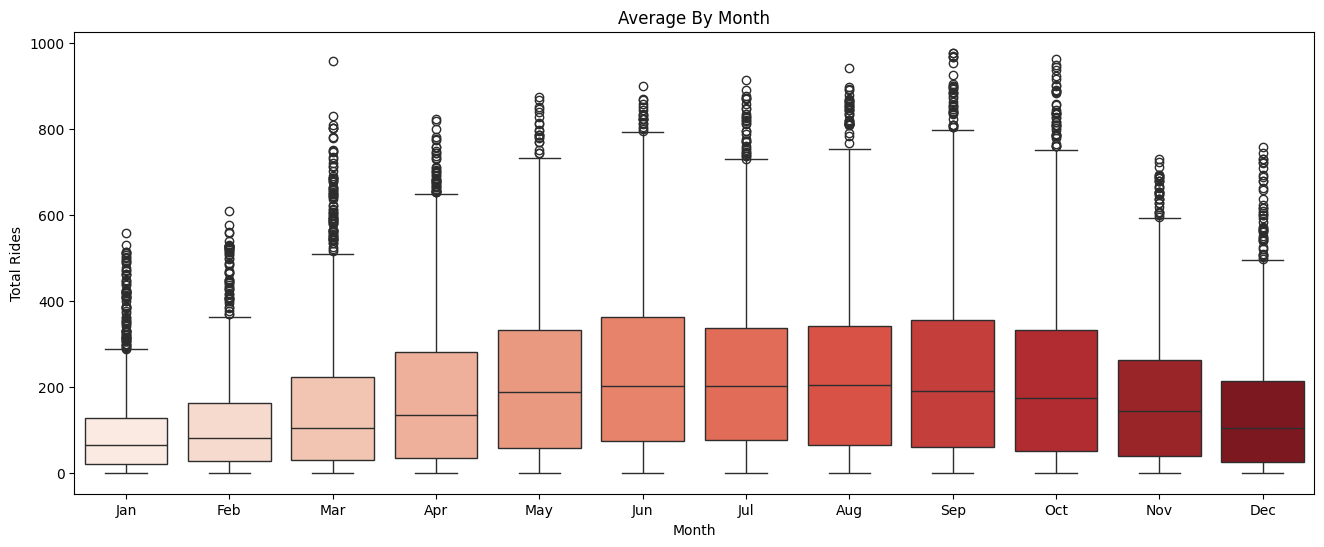

In [41]:
plt.figure(figsize=(16,6))

sns.boxplot(
    x="month_daily",
    y="total_count_hourly",
    hue="month_daily",
    data=bike_sharing,
    palette="Reds",
    legend=False
)

plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Average By Month")

plt.show()

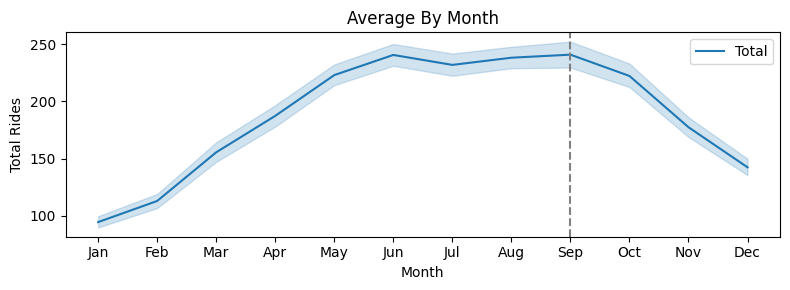

In [42]:
plt.figure(figsize=(8,3))

sns.lineplot(
    x="month_daily", 
    y="total_count_hourly", 
    data=bike_sharing, 
    label='Total'
)

x = np.arange(0, 12, 1)
plt.xticks(x)

plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Average By Month")

plt.axvline(x=8, color='gray', linestyle='--')

plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

### 5.4 Bikeshare users by weekday

In [43]:
bike_sharing.groupby(by="weekday_daily", observed=False).agg({
        "total_count_hourly": ["sum","mean", "max", "min", "std"]
})

total_count_hourly                                 
                             sum        mean  max min         std
weekday_daily                                                    
Sun                       444027  177.468825  776   1  168.167710
Mon                       455503  183.744655  968   1  179.514167
Tue                       469109  191.238891  970   1  187.820480
Wed                       473048  191.130505  977   1  190.894464
Thu                       485395  196.436665  976   1  188.011923
Fri                       487790  196.135907  957   1  174.076894
Sat                       477807  190.209793  783   1  179.820569

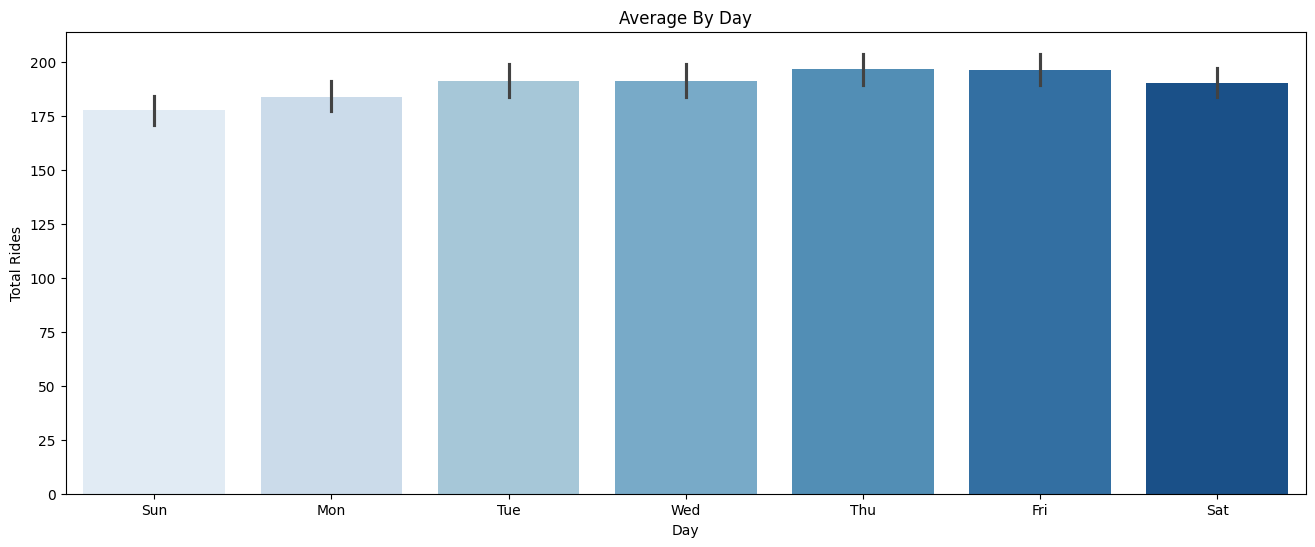

In [44]:
plt.figure(figsize=(16, 6))

sns.barplot(
    x="weekday_daily",
    y="total_count_hourly",
    hue="weekday_daily",
    data=bike_sharing,
    palette="Blues",
    legend=False
)

plt.xlabel("Day")
plt.ylabel("Total Rides")
plt.title("Average By Day")

plt.show()

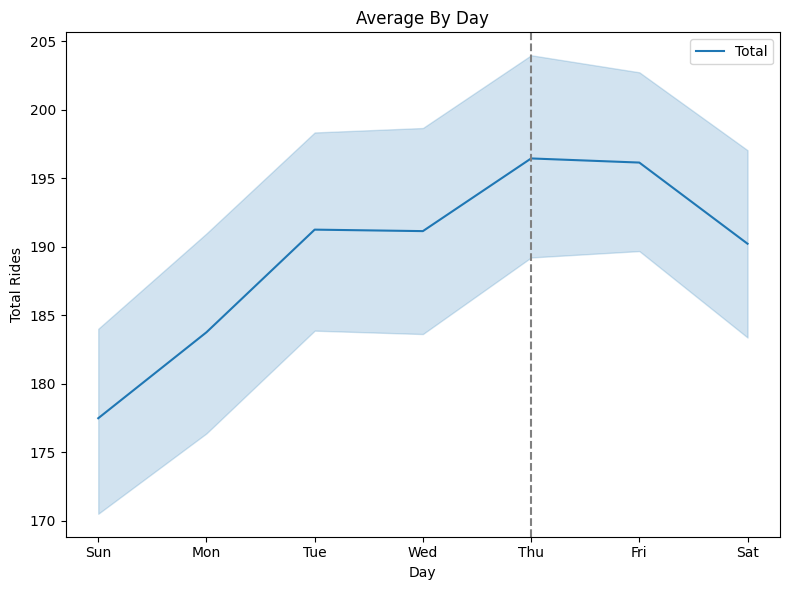

In [45]:
plt.figure(figsize=(8,6))

sns.lineplot(
    x="weekday_daily", 
    y="total_count_hourly", 
    data=bike_sharing, 
    label='Total'
)

x = np.arange(0, 7, 1)
plt.xticks(x)

plt.xlabel("Day")
plt.ylabel("Total Rides")
plt.title("Average By Day")

plt.axvline(x=4, color='gray', linestyle='--')

plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

### 5.5 Bikeshare users by customer category

In [46]:
bike_sharing.groupby("year_daily", observed=False).agg({
        "nonmember_hourly": ["mean"],
        "member_hourly": ["mean"]
})

,nonmember_hourly,member_hourly
,mean,mean
year_daily,,
2011,28.600578,115.193869
2012,42.679757,191.986604


In [47]:
bike_sharing.groupby(by=["year_daily", "month_daily"], observed=False).agg({
    "total_count_hourly": "mean",
})

total_count_hourly
year_daily month_daily                    
2011       Jan                   55.507267
           Feb                   74.291217
           Mar                   87.732877
           Apr                  131.947149
           May                  182.555108
           Jun                  199.322222
           Jul                  189.974462
           Aug                  186.991792
           Sep                  177.709902
           Oct                  166.232840
           Nov                  142.095967
           Dec                  117.844804
2012       Jan                  130.558704
           Feb                  149.041908
           Mar                  221.904441
           Apr                  242.651811
           May                  263.259409
           Jun                  281.708333
           Jul                  273.665323
           Aug                  288.310484
           Sep                  303.573611
           Oct                  280.848870
           Nov                  212.623955
           Dec                  166.729111

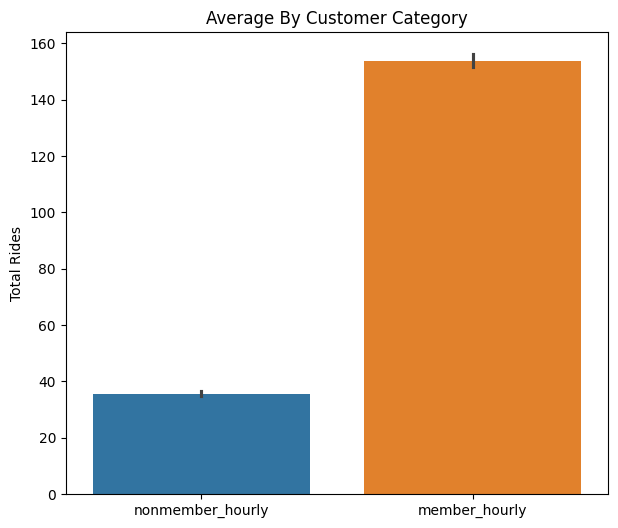

In [48]:
plt.figure(figsize=(7, 6))

sns.barplot(data=bike_sharing[['nonmember_hourly', 'member_hourly']])

plt.ylabel("Total Rides")
plt.title("Average By Customer Category")

plt.show()

## 6. Visualization & Explanatory Analysis

### 6.1. How many accumulated bikes rides permonth?

In [97]:
month_bikesharing = bike_sharing.groupby("month_daily", observed=False).agg({
    "nonmember_hourly": "sum",
    "member_hourly": "sum",
    "total_count_hourly": "sum"
})

month_bikesharing

,nonmember_hourly,member_hourly,total_count_hourly
month_daily,,,
Jan,12042,122891,134933
Feb,14963,136389,151352
Mar,44444,184476,228920
Apr,60802,208292,269094
May,75285,256401,331686
Jun,73906,272436,346342
Jul,78157,266791,344948
Aug,72039,279155,351194
Sep,70323,275668,345991


In [98]:
bike_sharing.groupby(by=["month_daily"], observed=False).agg({
    "total_count_hourly": ["sum","mean", "max", "min"]
})

total_count_hourly                     
                           sum        mean  max min
month_daily                                        
Jan                     134933   94.424773  559   1
Feb                     151352  112.865026  610   1
Mar                     228920  155.410726  957   1
Apr                     269094  187.260960  822   1
May                     331686  222.907258  873   1
Jun                     346342  240.515278  900   1
Jul                     344948  231.819892  913   1
Aug                     351194  238.097627  941   1
Sep                     345991  240.773138  977   1
Oct                     322352  222.158511  963   1
Nov                     254831  177.335421  729   1
Dec                     211036  142.303439  759   1

C:\Users\user\AppData\Local\Temp\ipykernel_4204\4111462215.py:4: UserWarning: 
The palette list has fewer values (4) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


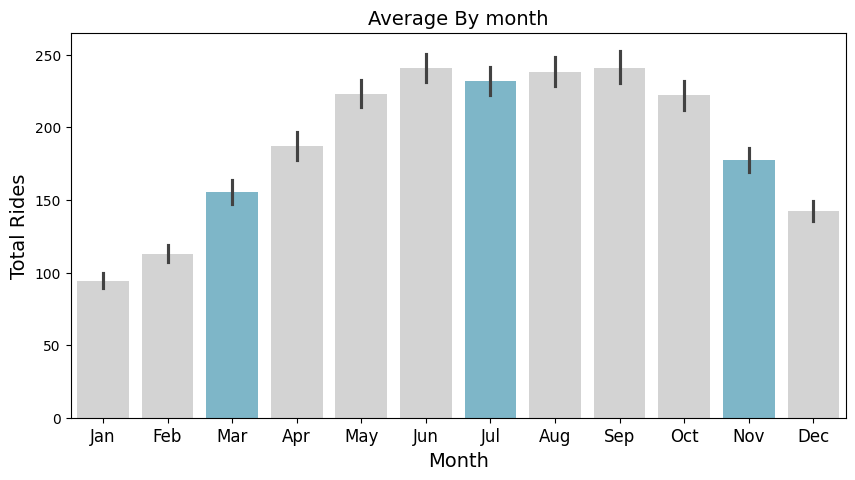

In [50]:
plt.figure(figsize=(10, 5))
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]
 
sns.barplot(
    x="month_daily",
    y="total_count_hourly", 
    hue="month_daily",
    data=bike_sharing.sort_values(by="total_count_hourly", ascending=False),
    palette=colors,
    legend = False
)

plt.title("Average By month", loc="center", fontsize=14)
plt.ylabel("Total Rides", loc="center", fontsize=14)
plt.xlabel("Month", loc="center", fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.show()


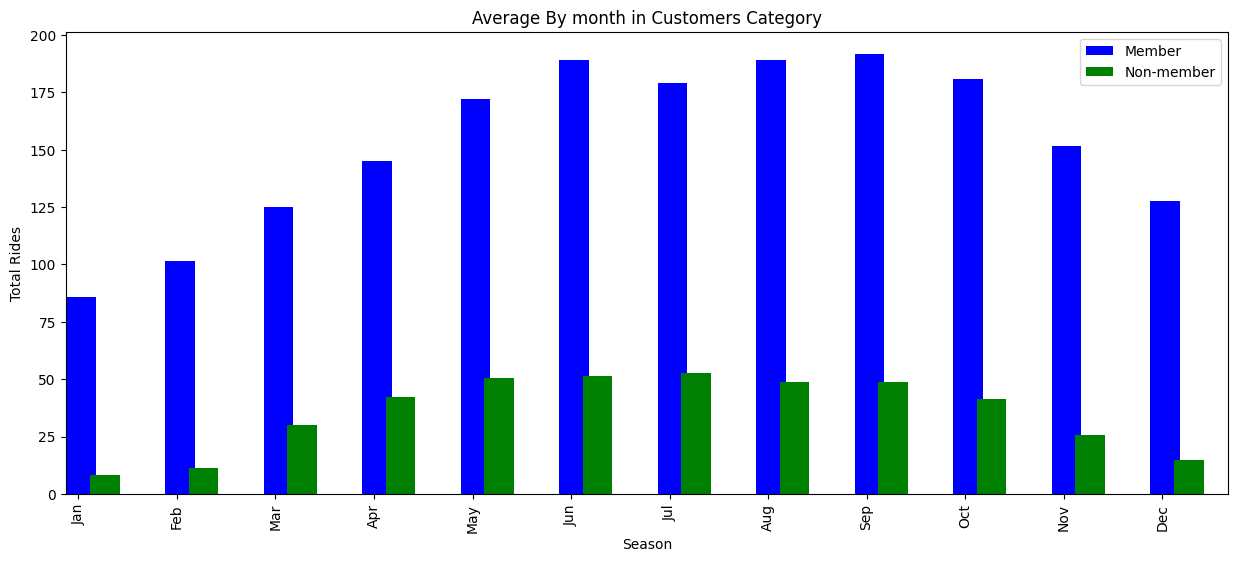

In [51]:
monthly_data = bike_sharing.groupby(by="month_daily", observed=False).agg({
    "member_hourly": "mean",
    "nonmember_hourly": ["mean"] 
})

fig, ax = plt.subplots(figsize=(15, 6))

monthly_data["member_hourly"]["mean"].plot(kind='bar', color='blue', position=0.4, width=0.3, label='Member', ax=ax)

monthly_data["nonmember_hourly"]["mean"].plot(kind='bar', color='green', position=-0.4, width=0.3, label='Non-member', ax=ax)

ax.set_title('Average By month in Customers Category')
ax.set_xlabel('Season')
ax.set_ylabel('Total Rides')
ax.legend()
plt.show()

### 6.2. How compared member and non-member customers total?

In [52]:
weekday_bikesharing = bike_sharing.groupby("weekday_daily", observed=False).agg({
    "nonmember_hourly": "sum",
    "member_hourly": "sum",
    "total_count_hourly": "sum"
})

weekday_bikesharing

,nonmember_hourly,member_hourly,total_count_hourly
weekday_daily,,,
Sun,140521,303506,444027
Mon,70784,384719,455503
Tue,57843,411266,469109
Wed,57319,415729,473048
Thu,61460,423935,485395
Fri,78238,409552,487790
Sat,153852,323955,477807


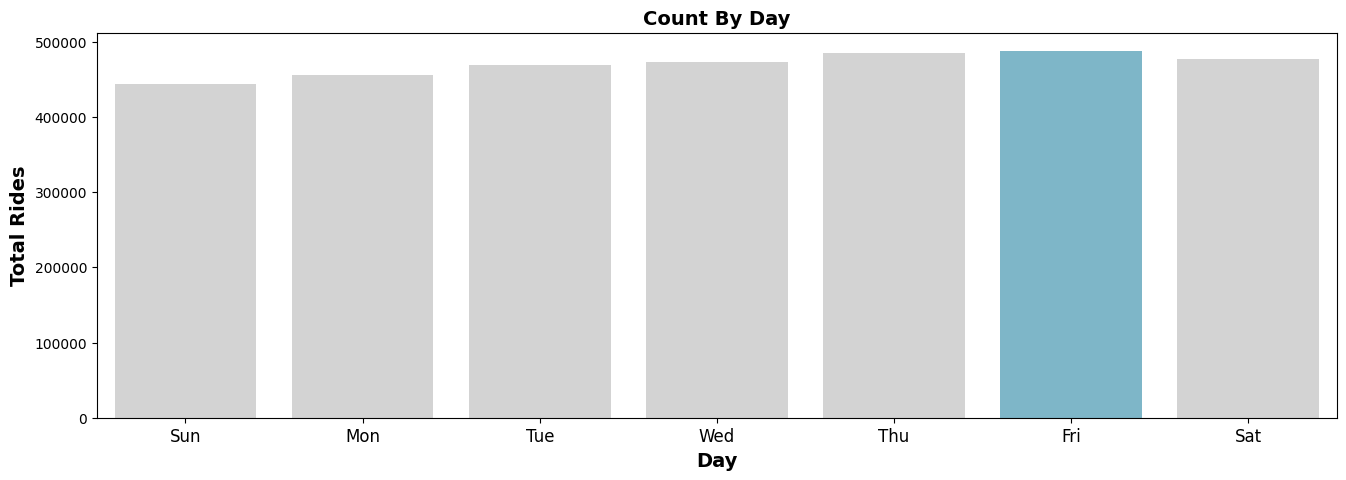

In [53]:
plt.figure(figsize=(16, 5))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

bike_sharing_sum = bike_sharing.groupby("weekday_daily", observed=False)["total_count_hourly"].sum().reset_index()

sns.barplot(
    x="weekday_daily",
    y="total_count_hourly",
    hue="weekday_daily",
    data=bike_sharing_sum,
    palette=colors,
    legend=False
)

plt.title("Count By Day", fontsize=14, weight='bold')
plt.xlabel("Day", fontsize=14, weight='bold')
plt.ylabel("Total Rides", fontsize=14, weight='bold')
plt.tick_params(axis='x', labelsize=12)
plt.show()

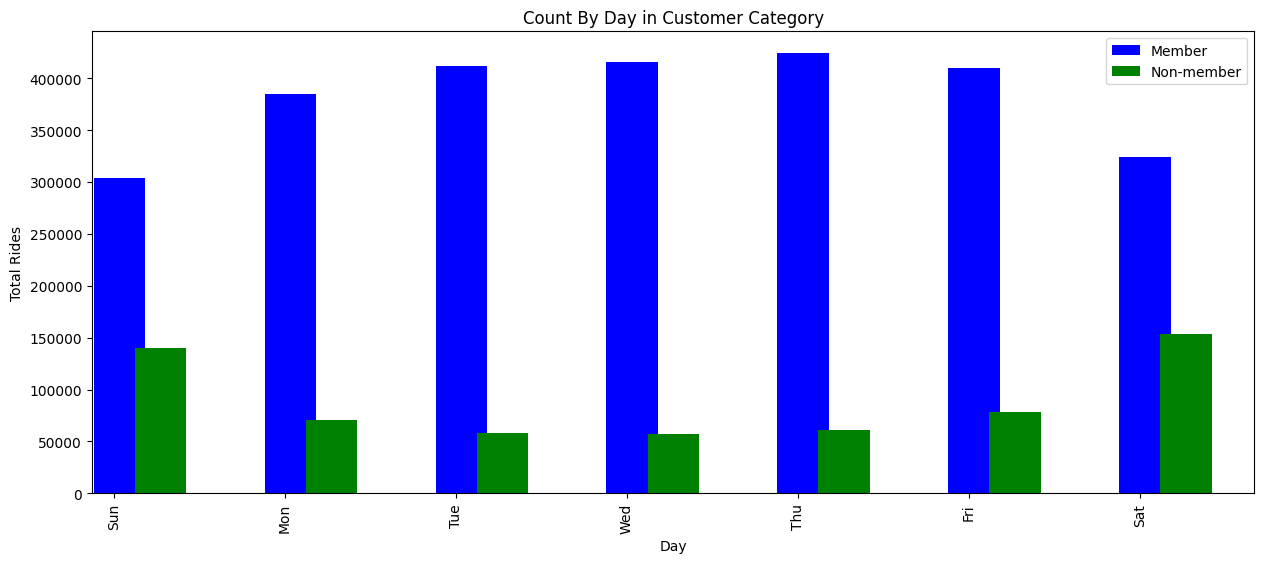

In [54]:
season_data = bike_sharing.groupby(by="weekday_daily", observed=False).agg({
    "member_hourly": "sum",
    "nonmember_hourly": ["sum"]
})

fig, ax = plt.subplots(figsize=(15, 6))

season_data["member_hourly"]["sum"].plot(kind='bar', color='blue', position=0.4, width=0.3, label='Member', ax=ax)

season_data["nonmember_hourly"]["sum"].plot(kind='bar', color='green', position=-0.4, width=0.3, label='Non-member', ax=ax)

ax.set_title("Count By Day in Customer Category")
ax.set_xlabel("Day")
ax.set_ylabel("Total Rides")
ax.legend()
plt.show()

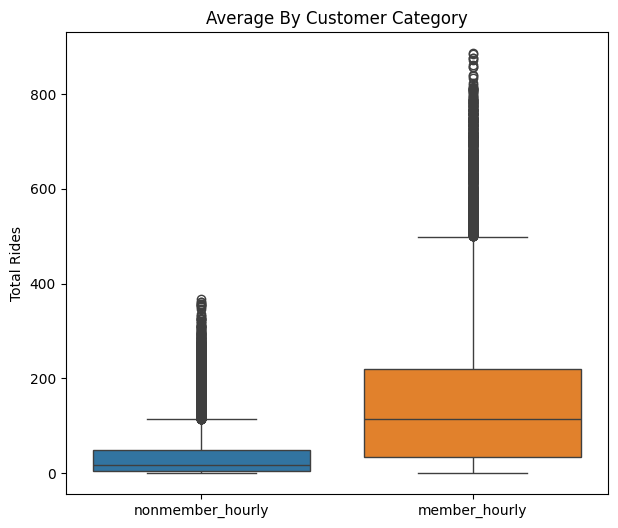

In [55]:
plt.figure(figsize=(7, 6))

sns.boxplot(data=bike_sharing[['nonmember_hourly', 'member_hourly']])

plt.ylabel("Total Rides")
plt.title("Average By Customer Category")

plt.show()

### 6.3 How's total rides based on weather of bike sharing?

In [99]:
weather_bikesharing = bike_sharing.groupby("weather_daily", observed=False).agg({
    "nonmember_hourly": "sum",
    "member_hourly": "sum",
    "total_count_hourly": "sum"
})

weather_bikesharing

,nonmember_hourly,member_hourly,total_count_hourly
weather_daily,,,
Clear,446346,1811606,2257952
Misty,169776,827082,996858
Light_RainSnow,3895,33974,37869


C:\Users\user\AppData\Local\Temp\ipykernel_4204\2773311726.py:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


Text(0.5, 1.0, 'Average By Weather')

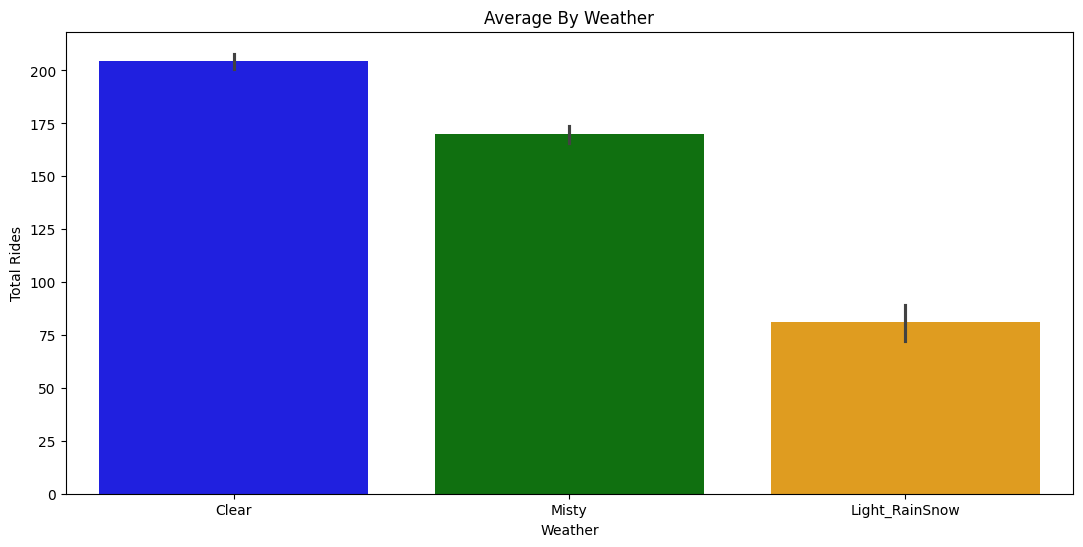

In [58]:
plt.figure(figsize=(13,6))

sns.barplot(
    x="weather_daily",
    y="total_count_hourly",
    hue="weather_daily",
    data=bike_sharing,
    palette=["blue", "green", "orange", "yellow"],
    legend=False
)

plt.xlabel("Weather")
plt.ylabel("Total Rides")
plt.title("Average By Weather")

INSIGHT

The number of bikeshares for clear weather is higher with a total of 2,257,952 compared to misty and Light_RainSnow.

### 6.4  What grafik of bikes rented in 2011 and 2012 per weekday?

In [59]:
bike_sharing.groupby(by=["year_daily"], observed=False).agg({
    "total_count_hourly": ["sum","mean", "max", "min"]
})

total_count_hourly                     
                          sum        mean  max min
year_daily                                        
2011                  1243103  143.794448  651   1
2012                  2049576  234.666361  977   1

In [59]:
bike_sharing.groupby(by=["year_daily"], observed=False).agg({
    "total_count_hourly": ["sum","mean", "max", "min"]
})

total_count_hourly                     
                          sum        mean  max min
year_daily                                        
2011                  1243103  143.794448  651   1
2012                  2049576  234.666361  977   1

In [60]:
bike_sharing.groupby(by=["year_daily", "season_daily"], observed=False).agg({
    "total_count_hourly": ["sum","mean", "max", "min"]
})

total_count_hourly                     
                                       sum        mean  max min
year_daily season_daily                                        
2011       Winter                   150000   72.533849  405   1
           Spring                   347316  157.655924  638   1
           Summer                   419650  187.343750  651   1
           Fall                     326137  152.828960  625   1
2012       Winter                   321348  147.814167  801   1
           Spring                   571273  258.963282  957   1
           Summer                   641479  284.343528  977   2
           Fall                     515476  245.698761  967   1

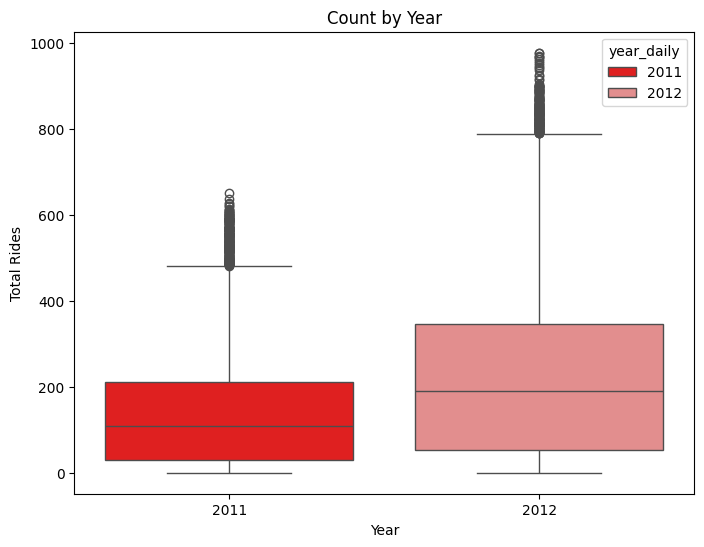

In [61]:
plt.figure(figsize=(8,6))

sns.boxplot(
    x="year_daily",
    y="total_count_hourly",
    hue="year_daily",
    data=bike_sharing,
    palette=["red", "lightcoral"]
)

plt.xlabel("Year")
plt.ylabel("Total Rides")
plt.title("Count by Year")

plt.show()

### Resample, which combines time series-based data (from daily to monthly)

In [82]:
monthly_data = bike_sharing.resample(rule='M', on='dateday').agg({
    "nonmember_hourly": "sum",
    "member_hourly": "sum",
    "total_count_hourly": "sum"
})

monthly_data.sort_index()

,nonmember_hourly,member_hourly,total_count_hourly
dateday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821
2011-06-30,30612,112900,143512
2011-07-31,36452,104889,141341
2011-08-31,28842,107849,136691
2011-09-30,26545,100873,127418


### Use the %b and %y string formats to display abbreviations of month and year names

In [74]:
monthly_data.index = monthly_data.index.strftime('%b-%y')
monthly_data.sort_index()

,nonmember_hourly,member_hourly,total_count_hourly
dateday,,,
Apr-11,22346,72524,94870
Apr-12,38456,135768,174224
Aug-11,28842,107849,136691
Aug-12,43197,171306,214503
Dec-11,8448,78875,87323
Dec-12,13245,110468,123713
Feb-11,6242,41973,48215
Feb-12,8721,94416,103137
Jan-11,3073,35116,38189


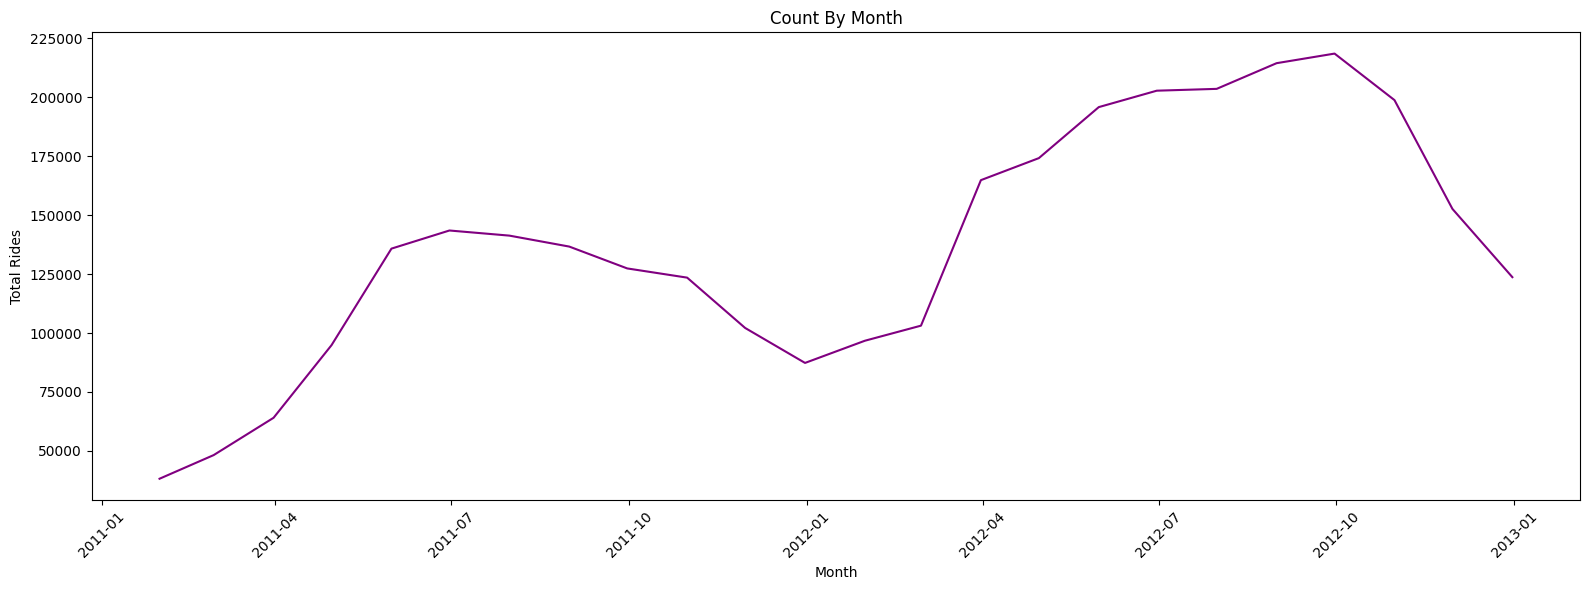

In [94]:
plt.figure(figsize=(16,6))

sns.lineplot(x="dateday", y="total_count_hourly", data=monthly_data, color='purple')

plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Count By Month")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

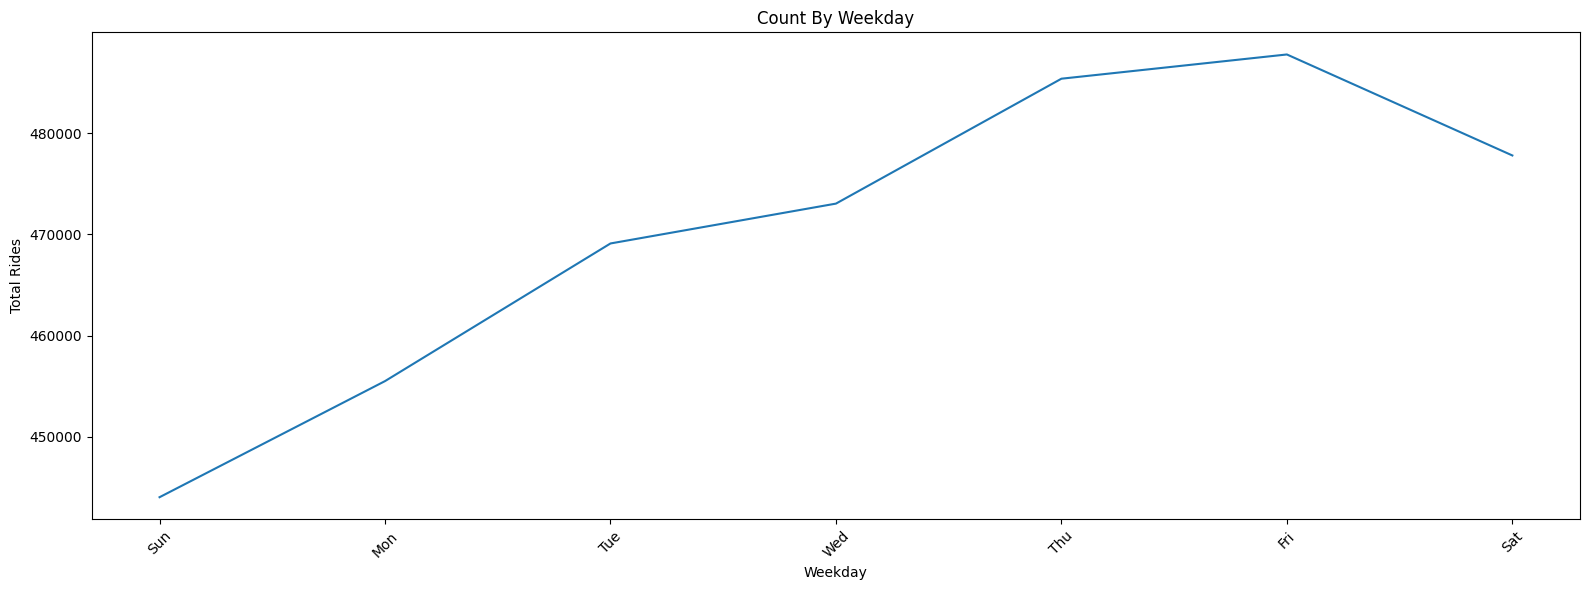

In [95]:
plt.figure(figsize=(16,6))

sns.lineplot(x="weekday_daily", y="total_count_hourly", data=bike_sharing_sum)

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count By Weekday")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4204\2894352116.py:2: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=bike_sharing, x='hour', y='total_count_hourly', hue='weekday_hourly', palette=["skyblue", "orange", "red", "green", "blue"], markers=True)


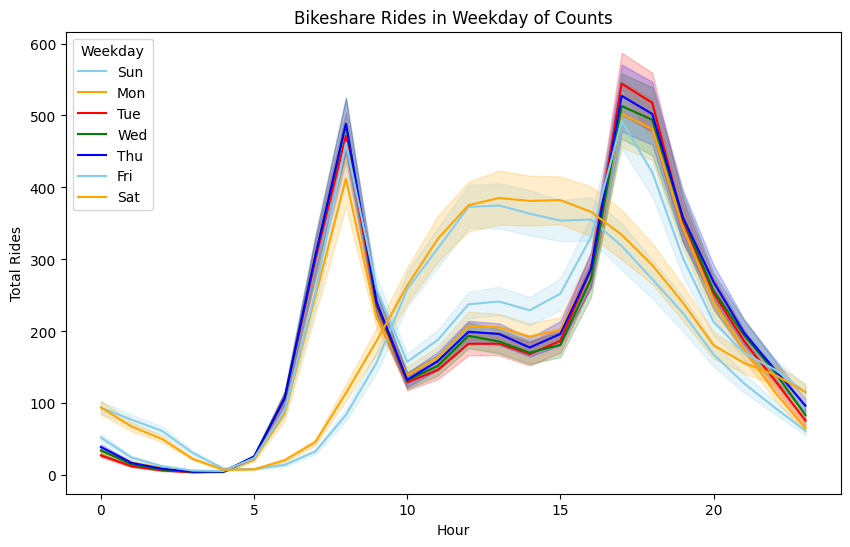

In [100]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=bike_sharing, x='hour', y='total_count_hourly', hue='weekday_hourly', palette=["skyblue", "orange", "red", "green", "blue"], markers=True)
plt.title("Bikeshare Rides in Weekday of Counts")
plt.xlabel('Hour')
plt.ylabel('Total Rides')
plt.legend(title='Weekday', loc='upper left')

INSIGHT

- In 2011, bicycle rentals had 1.243.103 customers, and increased in 2012 to have 2.049.576 customers.- 
The number of members riding bikeshare is higher than nonmembers, although both show similar trends throughout the year.

## 7. Conclusion

### 7.1 How many accumulated bikes rides per month?

- The highest number of bike sharing customers occurred in August with a total of 346,342 including non-member and member customers.

### 7.2 How compared member and non-member customers total?

- The number of bikeshares for member customers is higher for member card holders than for non-member customers, higher for daily activities.


### 7.3 How's total rides based on weather of bike sharing?


- The number of bikeshares for clear weather is higher with a total of 2,257,952 compared to misty and Light_RainSnow.

### 7.4 What grafik of bikes rented in 2011 and 2012 per weekday?

Based on the graph, the highest number of bike sharing customers in daily activity per hour occurs on Tuesdays between 15-20, 
but the graph still fluctuates.